<a href="https://colab.research.google.com/github/GBn321/KaggleProjects/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival

In [22]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from google.colab import files
uploaded = files.upload()
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

Saving train.csv to train (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


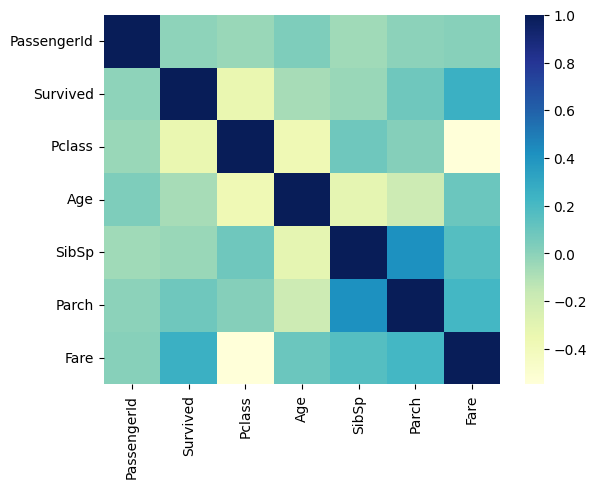

In [29]:
import seaborn as sns
numeric_data = titanic_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
  strat_train_set = titanic_data.loc[train_indices]
  stract_test_set = titanic_data.loc[test_indices]

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy="mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

In [40]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()
    column_names = ["C", "S", "Q", "N"]
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]
    matrix = encoder.fit_transform(X[['Sex']]).toarray()
    column_names = ["female", "male"]
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]
    return X

In [44]:
from os import error
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(["Name", "Ticket", "Cabin", "Embarked", "Sex", "N"], axis=1, errors="ignore")

In [45]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
  ("age_imputer", AgeImputer()),
  ("feature_encoder", FeatureEncoder()),
  ("feature_dropper", FeatureDropper())
])

In [46]:
strat_train_set = pipeline.fit_transform(strat_train_set)
strat_train_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
413,414,0,2,30.269439,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
686,687,0,3,14.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
562,563,0,2,28.000000,0,0,13.5000,0.0,0.0,1.0,0.0,1.0
647,648,1,1,56.000000,0,0,35.5000,1.0,0.0,0.0,0.0,1.0
389,390,1,2,17.000000,0,0,12.0000,1.0,0.0,0.0,1.0,0.0


In [47]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 413 to 489
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  female       712 non-null    float64
 11  male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [48]:
from sklearn.preprocessing import StandardScaler
X = strat_train_set.drop("Survived", axis=1)
y = strat_train_set["Survived"]
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [53]:
from ast import Param
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [{
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2,3,4]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score= True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [54]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [56]:
stract_test_set = pipeline.fit_transform(stract_test_set)
stract_test_set.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
715,716,0,3,19.000000,0,0,7.6500,0.0,0.0,1.0,0.0,1.0
377,378,0,1,27.000000,0,2,211.5000,1.0,0.0,0.0,0.0,1.0
253,254,0,3,30.000000,1,0,16.1000,0.0,0.0,1.0,0.0,1.0
176,177,0,3,27.441597,3,1,25.4667,0.0,0.0,1.0,0.0,1.0
222,223,0,3,51.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [58]:
X_test = stract_test_set.drop("Survived", axis=1)
y_test = stract_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [59]:
final_clf.score(X_data_test, y_data_test)

0.8379888268156425

In [60]:
final_data = pipeline.fit_transform(titanic_data)

In [62]:
X_final = final_data.drop("Survived", axis=1)
y_final = final_data["Survived"]

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [63]:
prod_clf = RandomForestClassifier()
param_grid = [{
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2,3,4]
}]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score= True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [64]:
prod_final_clf = grid_search.best_estimator_

In [65]:
from google.colab import files
uploaded = files.upload()
titanic_test_data = pd.read_csv("test.csv")
titanic_test_data.head()

Saving test.csv to test.csv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
final_test_data = pipeline.fit_transform(titanic_test_data)
X_final_test = final_test_data
X_final_test = X_final_test.ffill()
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [70]:
predictions = prod_final_clf.predict(X_data_final_test)

In [73]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions
final_df.head()

from google.colab import files
final_df.to_csv("submission.csv", index=False)
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section

In [103]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [104]:
train_data = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)


In [105]:
train_data.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [106]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [107]:
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"], drop_first=True)


In [108]:
from sklearn.model_selection import train_test_split

X = train_data.drop("Survived", axis=1)  # Features
y = train_data["Survived"]               # Label

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [110]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.8100558659217877


In [121]:
import pandas as pd

# Load the test data
test_data1 = pd.read_csv("test.csv")
test_data = test_data1.copy()

# Instead of inplace=True on the slice, assign back to the DataFrame
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])


# Apply the same one-hot encoding as training
test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"], drop_first=True)

# Ensure test_data has the same columns as training data
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0  # Add missing columns with default value 0

# Reorder columns to match training data
test_data = test_data[X_train.columns]

# Predict
predictions = model.predict(test_data)

print(predictions)


[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [124]:
final_df = pd.DataFrame(test_data1["PassengerId"])
final_df["Survived"] = predictions
final_df.head()

from google.colab import files
final_df.to_csv("submission2.csv", index=False)
files.download("submission2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Learn from CHAT GPT

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [126]:
# Step 2: Load the Titanic dataset
train_data = pd.read_csv("train.csv")

In [128]:
# Step 3: Handle missing values
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [131]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Step 4: Select useful features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]
y = train_data["Survived"]

# 14 - 08 - 2025

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [51]:
train_data =  train_data.drop(["Name", "Cabin", "Ticket"], axis=1)

In [52]:
train_data["Sex"] = train_data["Sex"].map({"male" : 0, "female" : 1})
train_data = pd.get_dummies(train_data, columns=["Embarked"], drop_first=True)


In [53]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8044692737430168


In [60]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# Define parameter grid (logarithmic scale for C)
param_grid = {
    'C': np.logspace(-3, 3, 7)  # [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize logistic regression
log_reg = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000
)
# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # Metric
    n_jobs=-1           # Use all CPU cores
)


In [61]:
# Fit grid search
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [62]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'C': np.float64(1.0)}
Best CV Accuracy: 0.790662858268492


In [67]:

# Evaluate on test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8044692737430168


In [66]:
test_data = pd.read_csv("test.csv")

In [68]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
test_data["Embarked"] = test_data["Embarked"].fillna(test_data["Embarked"].mode()[0])

In [69]:
test_data =  test_data.drop(["Name", "Cabin", "Ticket"], axis=1)
test_data["Sex"] = test_data["Sex"].map({"male" : 0, "female" : 1})
test_data = pd.get_dummies(test_data, columns=["Embarked"], drop_first=True)

In [71]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked_Q   418 non-null    bool   
 8   Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 23.8 KB


In [72]:
missing_cols = set(X_train.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X_train.columns]

In [74]:
# Predict survival
predictions = grid_search.best_estimator_.predict(test_data)

# Create submission file
submission = pd.DataFrame({
    "PassengerId": pd.read_csv("test.csv")["PassengerId"],
    "Survived": predictions
})

# Save to CSV
submission.to_csv("submission4.csv", index=False)
print("✅ submission4.csv created!")


✅ submission4.csv created!
